The main idea of this notebook is to show validation framework for our model. We are going to split the whole dataset into three parts: train, validation and test set. 

Test set will serve as a proxy for using model when it is completely finished, fine-tuned etc. In other words it will serve as a proxy for using our model in production, and again assesing 'real world' quality of the model. 

We are going to use distribution of 60%-20%-20% to split the whole dataset. I already know that there exists (stratified) cross-validation but as this course is intended as a 'first course' I will follow it along as is. No one said that you should always use cross-validation. Some people even propose that it is not that necessary depending on how much data you have! 

In terms of assesing the model performance, the idea of stratified k-fold CV makes complete sense. I'm not going to say it is ideal, but I would 'shake' less knowing that I used stratified k-fold CV. ;)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/data-preparation.csv")
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [3]:
#train_test_split?

In [4]:
#train_test_split splits the whole dataset into only two datasets, so first we are going to do 80%-20% split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [5]:
#Now, to get the same amount of data for validation set like in test set for it being full 60-20-20
#we need to see how much is 20%/80%. So, finally, we should split the df_full_train into 55%-25% where 55%
#belongs to the train_set and 25% belongs to the validation_set:

df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [6]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [7]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [8]:
#Instructor says that it is not necessary that we do the part to make indeces from random numbers to ordered 
#ones. Indeed, it wont harm the model or any process in any way but it seems convinient to adopt it.

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [9]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [10]:
#Finally, we will extract the target variables from each of those datasets. 

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

#and delete them as ML libraries work in such a fashion to split the feature matrix and target variables!
del df_train['churn']
del df_val['churn']
del df_test['churn']

At this point it would make sense to make another notebook for EDA, but I think it would be much more messy to extract these as csv's and work my way from there. I will stick with the same notebook for the EDA also!

# EDA (Explanatory Data Analysis)

In this part we will do basic EDA and see global churn rate, asses categorical and numerical features and start our analysis from there. We use ```df_full_train``` as assesing 'population' because we expect that ```df_test``` is something that might suprise us, in a sense, by putting model into production we can't guarantee what kind of distribution will happen. But if we do good with this data presented I think we shouldn't expect some drastic changes in the future distribution that await us. 

In [11]:
df_full_train = df_full_train.reset_index(drop=True)

In [12]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [13]:
#Check for missing values:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
#Check the churn rate:
round(df_full_train.churn.mean(),3)

0.27

The churn rate is the percentage of customers that actually churned. Say this dataset is a proxy for 'population' of one telco company then we see that the churn rate is relatively high (~27%) for a month!

Now, let's identify numerical and categorical features.

In [15]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [16]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [17]:
#Number of unique categories for all categorical features:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## On feature importance

I've seen people do all sort of stuff for assesing feature importance. They simply train a Decision Trees or Random Forest model out of blue and see which variables they found that are imporant. That seems like a plausible starting point, and I've used it in my projects also!

Since ML is more an engineering part, I think this is where the 'art of engineering' lays. 

I learned today new heuristics that sound intuitive, and yet simple in nature with good grounding for building on top of! 

Speaking of categorical variables and churn rate, one way to asses their importance is by seeing what is the churn rate relative to a category. Let's use for our first example 'gender'.

In [18]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

So, we are using a subset of male clients and relative to that subset we obtain how much males churned. We see that it is almost the same as our 'global churn rate'. 

Let's see what happens with female clients:

In [19]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

It would be too tideous to just do this for each categorical variable. Another thing to consider is how are we gonna compare it to 'global churn rate' which in a nutshell is average churn rate for 'population'? 

First, natural, idea that comes to mind is taking the difference between sub-category churn rate and average churn rate. Not only that it could make assesing importance much more easier by having just one number that desribes it, but also we can make a small 'for loop' to make it work for every category! 

The second association when it comes to 'comparing' two stuff reminds us of division, and thus we will also asses what is called 'a risk ratio'.

They both give us the same information, but I find it a bit easier to work with ratios. 

Remember these are all heuristics!

If you are working with differences as a heuristic then:

1) if ```global_churn - churn_of_subcategory << 0``` then it means that ```subcategory``` is more likely to churn  because in the difference is significantly less then zero it means that ```churn_of_subcategory``` is bigger,

2) if ```global_churn - churn_of_subcategory >> 0``` then it means that ```subcategory``` is less likely to churn because if the difference is more than zero it means that ```churn_of_subcategory``` is smaller than the ```global_churn```.

Know that we are not talking here about 'marginal differences' like those for female and male category, but when we see 'bump' with like >5% etc. then there might be some signal in that! 

It doesn't mean that one should prefer having 1) over 2) in choosing features, or vice versa. The important note is that there is significant difference, be it positive or negative, so to speak. One has to asses feature as a whole.

Here is the example of ```partner``` category:

In [20]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [21]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

Let's asses the differences:

In [22]:
global_churn = df_full_train.churn.mean()

global_churn - churn_partner, global_churn - churn_no_partner

(0.06493474245795922, -0.05984095297455855)

Looking this as a whole, it could indicate that this categorical feature might be important on predicting churn overall. In some sense, depending on having a partner or not it could have an effect on overall churn rate!

You can imagine it as having a machine with levers, where you can have ones which no matter how you pull them it wont affect working of a machine at all, but the other ones could change depend on how much you pull them, or in which direction!

Same thing applies to assesing importance via 'risk ratio' by comparing ```churn_of_subcategory``` with ```global_churn```. You divide two numbers. If the result of division is equal to 1 or pretty close to it then it means there is no risk of churn. If the result of division is larger than 1, then it means that we have higher risk of churn for that subcategory and conversely if the result of division is lower than 1, then it means there is a less risk of that subcategory to impact churn. 

Again, same as for differences heuristic, having results much less than 1 and/or much more than 1 means that "churn rate might depend choosing this over the other". 

In [23]:
churn_partner/global_churn, churn_no_partner/global_churn

(0.7594724924338315, 1.2216593879412643)

One final thing to mention is how to interpret these numbers. 

Dividing two numbers gives you (almost) a way to say percentage of one in another.

ex. 20/100 = 0.2, 15/30 = 0.5, 453/453 = 1

When you multiply 0.2 or 0.5 or 1 with 100 the result gives you the percentage. 

People tend to loosely say 20% when the result of division is 0.2, or 50% when the result of division is 0.5 and 100% when the result of division is 1. 

---

Oh, but now we have rate divided by rate! Almost the same thing applies, but now the result of division is interpreted like this:

1) if the result is less than 1 then solving for x in ```1-x=result``` tells you the percentage difference between the two rates,

2) if the result is more than 1 then solving for x in ```1+x=result```tells you the percentage difference between the two rates.

3) if the result is 1 then ```x=0```. ;)

Again, when you get the x you have to multiply it by 100 to say ```percentage difference between two rates```, but people do it mentaly in their head, and after a while you will also get used to it.


In [24]:
from IPython.display import display

In [25]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = global_churn - df_group['mean']
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


Well, you see that there are a lot of potential features and some of them having higher importance based on risk ratio or difference, but which of them are more significant than the others? 

## Mutual Information

---


The high-level idea of mutual information is: a measure of mutual dependence between two variables or the "amount of information" obtained about one random variable by observing the other random variable. 

My personal taste is to dive into this concept more deeply by understanding every bit of formula etc. but I've already done my first course in Information Theory, and I think there is nothing special with the formula itself, but somehow you had to find such 'model' (function) that relates to idea of increasing/decreasing information and the ideal one was formula for the entropy.  


I'm not going to spit out the definition of information but what I think is necessary for understanding this concept could be summed up in this next question.

What will give you more information, and from which book you will learn more: 

a) the book with random letters scattered all over the place with some words appearing out of randomness now and then, or

b) the book with more order (ex. Fight Club by Chuck Palahniuk) where you, ideally speaking, understand each word, punctuation etc.

I think the second one will give you more information and, theoretically speaking, more info will give you better knowledge than just random stuff. Look at the static on TV. Random noise. I never learned anything from that. But the more you start tuning your TV to get better picture, noise starts to decrease, picture starts to appear and at some point you get on what is screening on that channel. At some cut-off you understand what is presenting, but to understand all the details, ideally, you should tune to perfect picture!

That is loosely speaking the idea of entropy and information since they are relatable in that kind of 'equivalent relation' sense. 

You keep decreasing the entropy ("disorder"), you gain more information. The more information you have, you obtain more knowledge.

Draw 30 random points and then draw 30 points such that they are ordered that it looks like a circle. Give it to somebody and ask what they see. You 'rearanged' those points such that it looks like a circle. 

What about 'mutual information'? Think of it as reading a book to understand something. Say you have to understand Tolkien's World. What will give you more information (knowledge) about it:

a) Reading The Fellowship of The Ring, or

b) Reading Harry Potter?

I am not going to say that the b) will give you NO mutual information/knowledge whatsoever. You will see in next code snippets that some features give some amount of mutual information even if it is negligable! It may not be tightly related, but some stuff from Harry Potter will be applicable to Tolkien's world! What I can guarantee you is that by ignoring Harry Potter books will make you a better fan of Tolkien. ;)

Nobody said that you shouldn't test mutual information between other variables, but we started with the idea of testing each variable relative to target variable and rank them to see which ones are the most important. 

Later on, we will introduce SHAP values!

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.churn)

df_mi = df_full_train[categorical].apply(calculate_mi) #For each column apply calculate_mi function
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')#Sort it by descending order


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


## Decision Tree

As I've mentioned, some people use Decision Trees, Random Forests to see if their intuition about feature engineering is right, sometimes whilst doing feature selection and sometimes out of blue. It never hurts to try different methods and possibly decide out of those methods which features could be best becasue they occur very much. 

Lets see what plain Decision Tree (without hyperparameter tuning) can say about the importance of features. Decision Trees are also using information gain ranking (Gini Impurity also!), and in that sense it could be tightly related with mutual information. They are also relatively fast to train. Also, similar to mutual information, we use it on 'full train' dataset and relative to 'global churn'. We are not trying to leak anything! 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

RANDOM_STATE = 42

dt = DecisionTreeClassifier(random_state = RANDOM_STATE, criterion = "entropy")

In [29]:
#For modeling using scikit-learn, all the variables should be numeric, so we will have to change the labels.
dt_full = df_full_train[categorical]
le = LabelEncoder()
le_df = dt_full.apply(le.fit_transform)

In [30]:
dt.fit(le_df, df_full_train.churn)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
#Obtaining feature importances
tree_features = pd.DataFrame(data = dt.feature_importances_,
                             index = dt_full.columns,
                             columns = ['Importance'])

In [32]:
tree_features.sort_values(by = 'Importance', ascending = False).head()

,Importance
contract,0.219455
paymentmethod,0.108330
partner,0.065569
multiplelines,0.063916
gender,0.063827


In [33]:
df_mi.head()

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


Well, seems like ```contract``` is our best feature indeed, but you see the rest of the features are ones which MI concluded that are one of the "worst ones". I suspect that we might be overfiting here and should tune Decision Tree, so let's give it a try and tune them using GridSearchCV!

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#Defining hyperparameters for tuning a decision tree
tree_params = {'max_depth': range(2, 11), 
               'min_samples_leaf' : range(2,11)}

#Defining 5-fold stratified cross-validation scheme
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

In [35]:
#Using GridSearchCV to test all possible permutations of tree_params to find the optimal score on validation set
tree_grid = GridSearchCV(estimator = dt, scoring = 'accuracy',  param_grid = tree_params, cv = skf, n_jobs = -1)

In [36]:
%%time
tree_grid.fit(le_df, df_full_train.churn)

CPU times: user 598 ms, sys: 199 ms, total: 798 ms
Wall time: 3.31 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(2, 11)},
             scoring='accuracy')

In [37]:
#Saving all the features
tree_features = pd.DataFrame(data = tree_grid.best_estimator_.feature_importances_,
                             index = dt_full.columns,
                             columns = ['Importance according to DTs'])

#Ploting the feature importances
tree_features.sort_values(by = "Importance according to DTs", ascending = False).head()

,Importance according to DTs
contract,0.687786
onlinesecurity,0.117954
internetservice,0.091018
streamingmovies,0.042400
onlinebackup,0.027831


In [38]:
df_mi.head()

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


Seems like tuned tree with the best score captured pretty much what MI score was capturing. It could be debatable whether ```techsupport``` is actually more crucial than ```streamingmovies```. In my opinion, where I live, the choice of movies and TV series on ISP is pretty poor and many people I know don't watch TV channels as they used to. Having a stable Internet and cheap streaming platforms offering top-notch movies and series is a way to go these days. Tech support is also crucial factor for choosing an ISP, and since we have a historical data of past months we can't get the full picture if it is faulty at all or was during those months of data collection. Let's see if we can conclude something more from those top five features via countplots.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

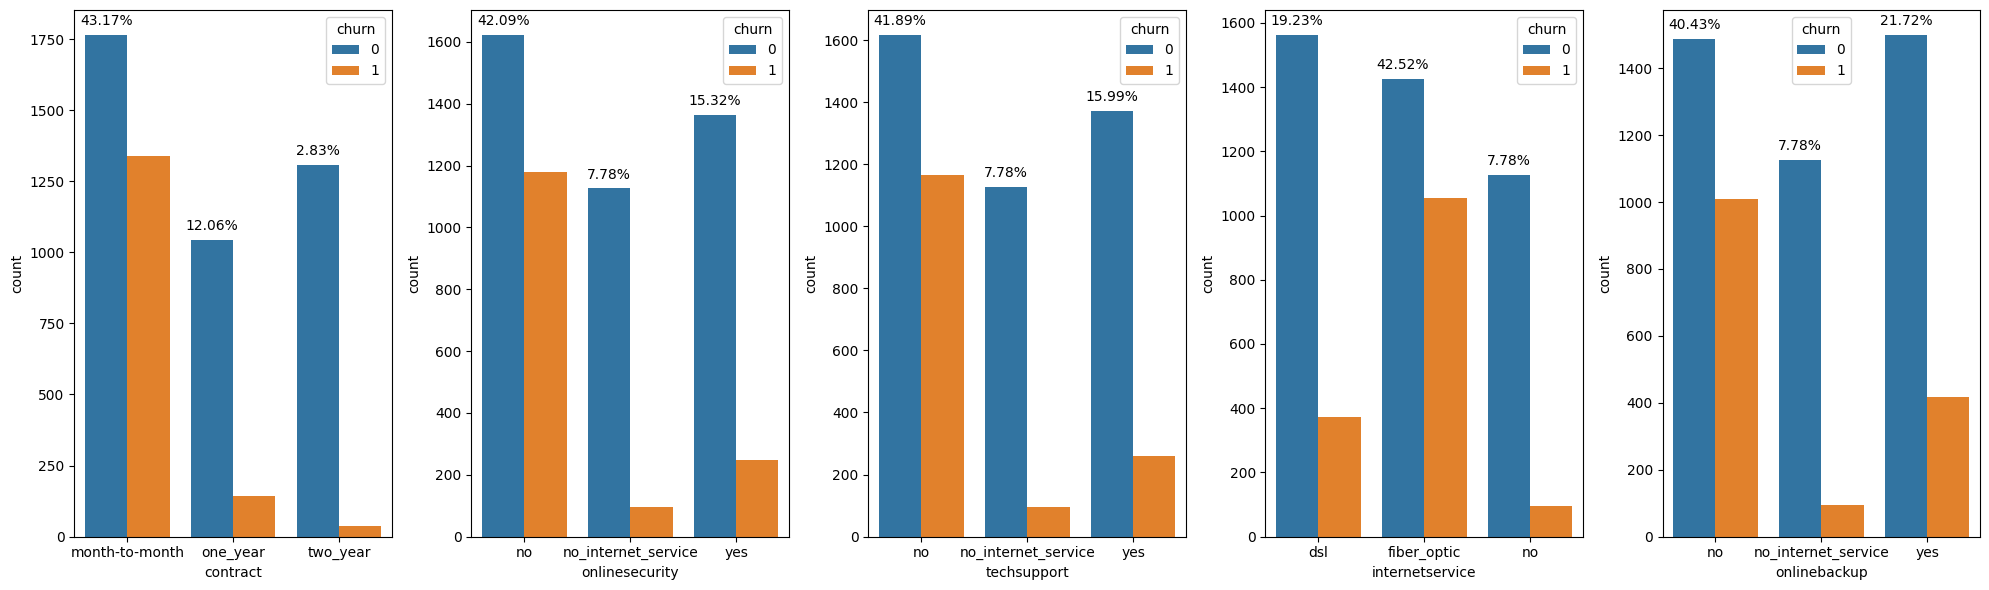

In [40]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
axes = axes.flatten()

for i, category in enumerate(list(df_mi.head().T.columns)):
    
    sorted_labels = sorted(df_full_train[category].unique())
    
    sns.countplot(x=category, hue="churn", data=df_full_train, ax=axes[i], order = sorted_labels)
    
    # Calculate and display churn rate on each subplot
    churn_rate = df_full_train.groupby(category)['churn'].mean()
    for p, label in zip(axes[i].patches, churn_rate):
        axes[i].annotate(f'{label:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

I've put the churn rates for each subcategory above the charts to get a better sense what is happening.
We see that month-to-month contract is where most people churn. Let's see how many clients have month-to-month contract.

In [41]:
#Percent of clients with month-to-month contract
print(str(round(len(df_full_train[df_full_train['contract'] == 'month-to-month'])*100/len(df_full_train),2)) + '%')

55.09%


So, most of the clients come into that group. What kind of policy is month-to-month should be further investigated. Maybe telco company has problems with churning because of just having that 'month-to-month' offer, or even if there is an offer something with it makes clients unsatisfied.

---

Having no online security (or not offering in their packages), no tech support and no online backup is also what is mostly why people churn as you can see. We also see that there are some issues with fiber optic type of Internet Service. Maybe they should fix that too. I would be also highly suspicious of having nearly ~20% churn rate for DSL, and also further investigate churn rate of 22% for having an online backup. Maybe some services need fixing.

## Correlation

Now is time to check numerical features and sort their importance relative to target variable. We start by revisiting the concept of Pearson Correlation. It is a measure of linear correlation between two sets of data. Without bragging too much about it, the one thing that every experienced statistician will tell you is that only calculating correlation coefficient is not enough, since (sometimes) one can get a false sense of data.
Not to mention the fact that 'correlation does not imply causation'. Always be careful of that!

I never encountered a dataset that is that synthetic in nature, but knowing that such problems may arise is a good 'reality-check'. I would encourage you to familiarize youself with the concept of **Anscombe's quartet**.

The only info you'll get out of correlation coefficient is **'how often increasing one variable will increase/decrease the other one'**. Boundaries for intepreting such coefficients are not set in stone, but you can guarantee that if coefficient is around zero then increasing one variable will **rarely** increase/decrease the other one. Or, for example, if you see that the coefficient is around +1 or -1 then by increasing one variable you will **often/always** see increase/decrease in other variable. Everything in between, however you define the boundaries, will mean something 'moderate' in nature, and thus by increasing one variable it will **sometimes** lead to increasing/decreasing the other variable.

In [42]:
#Let's calculate the correlation coefficients for all numerical features
df_full_train[numerical].corrwith(df_full_train.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


I will use these results purely as a way to inform what might happen when the model is trained, and thus how would they affect predicting churn.

---

```tenure``` represents number of months client stays within telco company, and having a negative correlation is a bit intuitive because one expects that the more clients stay the more likely they are the loyal customers but in some 'moderate fashion' as result of -0.35 implies. That seems like a rational conclusion after all. 

Let's visualize it using box-plot.

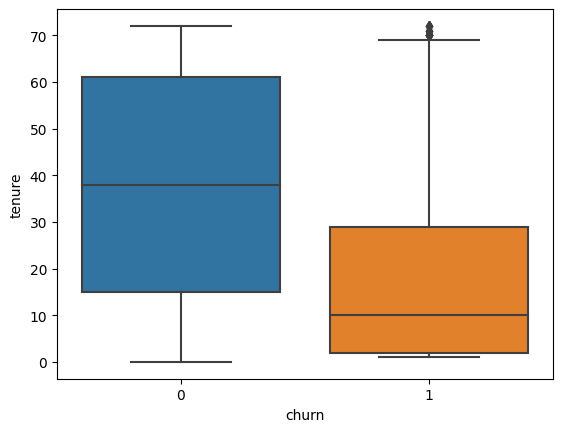

In [43]:
sns.boxplot(x='churn', y='tenure', data=df_full_train)
plt.show()

It might be tricky to understand this plot if you are not used to them, but at first focus on the discrepancy between medians (vertical line inside box-plot) for customers that churned vs the ones that didn't. Now, focus your attention on those who churned (<font color='orange'>**orange box**</font>) and you will see that those are customers that don't stay long in a company. Since ```tenure``` represents number of months client stays you can eyeball that those who stay at least a year are less likely to churn (<font color='blue'>**blue box**</font>).

Why do customers churn after short period of times is a good question to ask. We will see some signal in analyzing churn rate vs ```monthlycharges```.

Let's get some quick check if correlation coefficient makes sense with crunching few numbers. 

In [44]:
#How many clients churned having tenure less than three months?
df_full_train[df_full_train.tenure <=3].churn.mean()

0.5669014084507042

In [45]:
#More than three months but less then a year?
df_full_train[(df_full_train.tenure >3) & (df_full_train.tenure <= 12)].churn.mean()

0.39053905390539057

In [46]:
#More than a year?
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

You see from this monotonic decrease that correlation coefficient indeed makes sense. 

---

Let's hop on to ```monthly charges```.

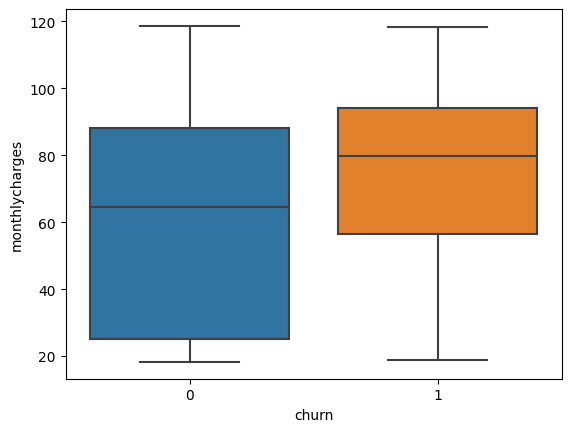

In [47]:
sns.boxplot(x='churn', y='monthlycharges', data=df_full_train)
plt.show()

Obvious discrepancy, but correlation coefficient of around 0.2 *shouldn't* scare you. Again, this is all done in order to inform what to expect from each numerical feature. 

What should be obvious from this plot is the fact that the bigger the charges per month the more people will churn. Maybe they are not satisfied with what is offered within tariff? Remember that top five important categorical features are: ```contract```, ```onlinesecurity```, ```techsupport```, ```internetservice``` and ```onlinebackup```. There might be some correlation in that!

Let's do some quick back-of-the-envelope calculations:

In [48]:
#Monthly charges less than 20$
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [49]:
#Monthly charges more than 20$ and less than 50$
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [50]:
#Monthly charges more than 50$
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

The last one to check is ```totalcharges``` and negative correlation might sound unintuitive at first. One would think 'the more customer pays the less likely he would stay within that company", but bear in mind that ```tenure``` is in a sense correlated with ```totalcharges```. ```totalcharges``` explains sum of all the charges since client signed for services, and we saw that loyal customers (bigger ```tenure```) implies that they stay longer. The longer they stay, the more their total charge will be. 

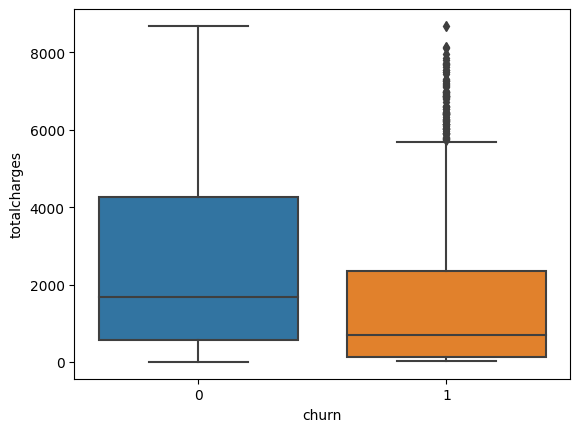

In [51]:
sns.boxplot(x='churn', y='totalcharges', data=df_full_train)
plt.show()

# Logistic Regression

I'm not going to brag about Logistic Regression here, but I've learned some valuable concepts that I didn't knew how to interpret the first time. I always knew that Sigmoid function is there to translate domain of all real numbers to numbers between 0 and 1 which could be basically interpreted as probability of positive class. Positive class means 'clients who churned', and negative class means 'clients who didn't churn'. So, given a client represented as a row in our dataframe with all the features the output of the logistic regresion will be probability that the client will churn. 


Let's draw a Sigmoid function to make sense around this. 

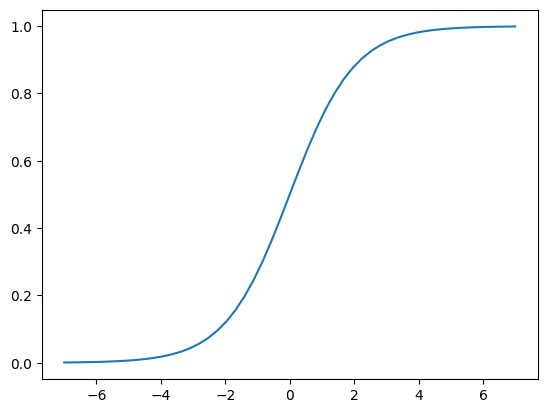

In [52]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-7, 7, 51)

plt.plot(z,sigmoid(z));

We see that codomain of Sigmoid function is between 0 and 1. The input to Sigmoid function (it's domain) is a result of calculating vector form of linear regression. 

Here is a mental model to think about Logistic Regression:

dataset_with_features -> linear_regression_with_bias_and_weights -> sigmoid(linear_regression)

So, basically what this 'algorithm' does is using our dataset/matrix with features and values, trains linear regression obtaining proper weights and bias for that dataset. The result of that goes into Sigmoid function such that it outputs probability of a positive class.

We can choose cut-off probability from which one would say 'from this cut-off up to probability of 1 we will say that the person will churn'. By default, that probability is 0.5. 

Probabilities are called 'soft predictions', and together with cutt-off probability of 0.5 we map each of the output probability to positive/negative class and we call those 'hard predictions'. 

ex. Say we obtained a probability of 0.8447. That is called the 'soft prediction'. Now, knowing that the cut-off probability is 0.5 we can map 0.8447 to a 'hard prediction' and thus we get 1 which says that someone churned.

ex. Say we obtained a probability of 0.0245. We get the 'hard prediction' as 0, which says someone didn't churned. 

Don't get confused because ```predict_proba``` function outputs both the probability for 1s and 0s. It should not bother you that much because if it predicts probability of positive class then to calculate probability of negative class is simply ```1-p_positive_class```. I've seen people looking at probabilities of positive class, seeing it is small and they get confused thinking they should only look for higher probabilities. Don't fall into that trap! 

---

We will first prepare our dataset by doing one-hot encoding via ```DictVectorizer```. It is smart to one-hot encode categorical variables, and even if you input numerical ones it will not try to encode them. It will leave them as they are which in an essence prepares our whole dataset for us in one run!

```DictVectorizer.fit()``` will 'learn' how to encode those features and it will keep the encodings. Then we use ```DictVectorizer.transform()``` to apply those learned encodings to *any* dataframe we want!

In [53]:
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical + numerical].to_dict(orient='records')
val_dict = df_val[categorical + numerical].to_dict(orient='records')


dv = DictVectorizer(sparse=False)
dv.fit(train_dict) #This serves only as a way to 'learn' encodings of our dataset

X_train = dv.transform(train_dict) #Here is where we apply those learned encodings
X_val = dv.transform(val_dict) #Here also!

Now, we will train ```LogisticRegression``` model on ```X_train```.

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Let's see all the coefficients that the model 'learned'. First we will start with the bias term. 

Here is a simple model to have in mind:

```bias + weight * input```

As you see, bias term is not 'attached' to any weight or an input, and in an essence it is 'a free term'. 
Bias term could be interpreted as what we assume about the customer without knowing anything about him! All that expressed in one number, bias. The input doesn't have to be 0! It is simply 'a ground truth' or 'starting point' for interpreting any customer. 
Here is how we pull it out from the model:

In [55]:
bias = model.intercept_[0].round(3)
bias

-0.122

Since ```sigmoid(bias + weight * input)``` tells the probability of churn then ```sigmoid(bias)``` would give 'base probability'; probability that the customer would churn (leave telco company) without us even knowing anything about him!

In [56]:
sigmoid(bias).round(3)

0.47

Whoa, our base probability is pretty high! What are the other things that affect our probability of churn?

Now come the weights which for each feature tell in an essence a correlation between them and the churn. Don't get affraid if each subcategory of a category has it's own weight. Remember that we one-hot encoded them and they could be thought as 'switches' because one-hot encoding makes them 1s and 0s. We will get to that a bit later! For now, let's put them all in a DataFrame.

In [57]:
weights = pd.DataFrame()
weights['features'] = dv.feature_names_
weights['coefficients'] = model.coef_[0].round(3)

In [58]:
weights.head(10)

,features,coefficients
0,contract=month-to-month,0.607
1,contract=one_year,-0.058
2,contract=two_year,-0.671
3,dependents=no,-0.028
4,dependents=yes,-0.094
5,deviceprotection=no,0.052
6,deviceprotection=no_internet_service,-0.103
7,deviceprotection=yes,-0.071
8,gender=female,-0.042
9,gender=male,-0.080


In [59]:
len(weights)

45

So, there are a lot of weights to unpack but let's say for the simplicity sake that our model depends only on bias term, ```contract``` and ```monthlycharges```:

In [60]:
mask = weights['features'].str.contains('contract|monthly', case=False, regex=True)

# Apply the mask to get the filtered DataFrame
filtered_df = weights[mask]

# Display the result
filtered_df

,features,coefficients
0,contract=month-to-month,0.607
1,contract=one_year,-0.058
2,contract=two_year,-0.671
13,monthlycharges,0.002


How do you interpret these coefficients?

Well, first of all we said that we put something that looks like linear regression inside sigmoid function:

```sigmoid([-0.122]+[0.607*month_to_month+(-0.058)*one_year+(-0.671)*two_year]+[0.002*monthlycharges])```

where ```[-0.122]``` is the bias part, ```[0.607*month_to_month+(-0.058)*one_year+(-0.671)*two_year]``` is ```contract``` and ```[0.002*monthlycharges]``` is ```monthlycharges```.


Why I am mentioning all of this? For categorical variable, since we one-hot encoded it, if I say 'we have a customer that has month-to-month contract' then ```month_to_month==1```, ```one_year==0``` and ```two_year==0```. You get the idea.


But say for example we have customer that has ```two_year``` contract and ```monthlycharges==20$```. How will it affect the probability of customer churning?

Let's graph sigmoid function again:

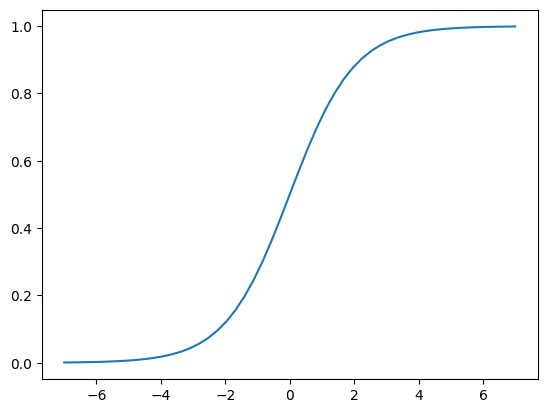

In [61]:
plt.plot(z,sigmoid(z));

Imagine that using + and - on the x-axis means that we go left/right. So, we see that by going more to the left the probability of churning decreases since if x<0 then probability is getting towards 0. 

In our example we obtain this: 
```sigmoid([-0.122]+[0.607*0+(-0.058)*0+(-0.671)*1]+[0.002*20])``` and thus:
```sigmoid([-0.122]+[(-0.671)*1]+[0.002*20])```

but how each of this variable affects the probability? We see that the bias term is negative and it draws x towards lower probability right at the start. Next, we see that two_year weight is also negative it 'helps' even more. As we discussed in the EDA, the more customer stays with us the more loyal he/she is and less likely to churn. In some sense this weight of -0.671 could also be interpreted right here as a negative correlation between two_year contract and churn rate! 

So, we started with -0.122, then we moved towards left another -0.671 units. Now what about the ```monthly_charges```?

We see that it will move us on x-axis towards positive probability but even so slightly!

Note: In the video the same feature (```monthly_charges```) had much bigger importance but bear in mind that the instructor is using only three features to train his model!

Let's see the probability of churn for such customer given the 'reduced model' with only three features:

In [62]:
sigmoid(-0.122-0.671*1+0.002*20)

0.32016796752355453

# Assesing the model performance (Accuracy)

Next, we will asses how good our model really is on unseen data ```X_valid```. We never mentioned what kind of metric we are optimizing, and since this course refresher didn't tackled it also at this point we will assume that **accuracy** is a way to measure how good this model might be. 

Accuracy will measure "given ground truths for validation dataset and hard predictions from Logistic Regresson, how many of them model guessed right".

In [63]:
#Obtaining probability of customer churning
y_pred_proba = model.predict_proba(X_val)[:,1]

#Explicitly defining (even if it is by default) that cut-off probability is 0.5
churn_decision = (y_pred_proba >= 0.5)

In [64]:
#Creating a dataframe containing all the info we need
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_proba
df_pred['actual'] = y_val
df_pred['prediction'] = churn_decision.astype(int)
df_pred['correct'] = df_pred.prediction == df_pred.actual

df_pred.tail(10)

,probability,actual,prediction,correct
1399,0.722384,1,1,True
1400,0.074314,0,0,True
1401,0.001490,0,0,True
1402,0.017639,0,0,True
1403,0.089972,0,0,True
1404,0.295302,0,0,True
1405,0.040019,1,0,False
1406,0.148880,0,0,True
1407,0.784839,1,1,True
1408,0.810581,1,1,True


In [65]:
#Accuracy of a model given threshold 0.5 for probabilities
df_pred.correct.mean()

0.8055358410220014

We see that our model is seemingly pretty good (80% of accuracy), but it has mistakes. There are false positives, where the ground truth is that customer won't churn but the model predicted it will. That's a mistake. It is 'falsing us' that the customer will churn or 'we have a false belief that such customer will churn'. There are also false negatives, where the ground truth is that the person will churn but we predicted that it wont. If the idea of company is to optimize for those guys rather than accuracy it is all good but it comes with a trade-off! 

There is a tendency to optimize the ROC/AUC score instead of accuracy and find the model who gives the best ROC/AUC score. Why is that? Because, ideally if you have AUC==1, then you can ideally choose/hardcode the rate of TPR (True Positive Rate) or FPR (False Positive Rate) by your taste and with best accuracy. 

If our model is correct in all the predictions (not just churn but also those who don't churn!), all the time, it means that the TPR is always 1.0, and FPR is 0. It finds all the cases and never gives false alarms.

In our case it would be ideal to focus on True Positives because churning is making our telco company run out of customers and money, so we could save the company by sending those True Positives a promotional emails or do different kind of measures for that matter. No model will give you ideal AUC==1, but in choosing between models for that matter we would seek for one that gives the best AUC, because the closer the AUC score is to 1, then our model could be better and better in accuracy (detecting both 0s and 1s).   

Let's see how our model scores on AUC.

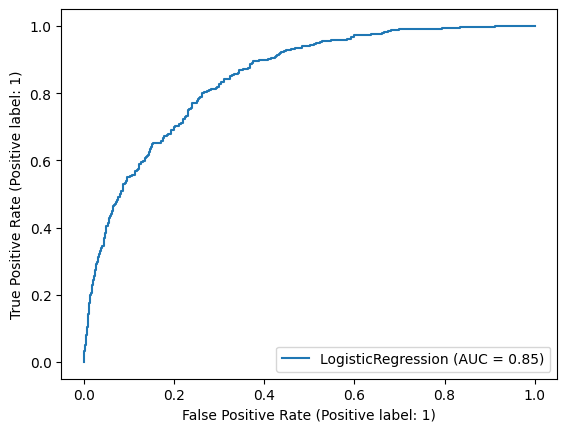

In [66]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, precision_score

svc_disp = RocCurveDisplay.from_estimator(model, X_val, y_val)
plt.show()

So, one would say "setting a cut-of probability to be >=0 then you are predicting that everybody 'churned' and you are also capturing all True Positives". Let's do that.

In [67]:
#Setting a cut-off probability to be >=0
churn_decision = (y_pred_proba >= 0)
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_proba
df_pred['actual'] = y_val
df_pred['prediction'] = churn_decision.astype(int)
df_pred['correct'] = df_pred.prediction == df_pred.actual 

df_pred.head(10)

,probability,actual,prediction,correct
0,0.007359,0,1,False
1,0.209721,0,1,False
2,0.220708,0,1,False
3,0.575035,1,1,True
4,0.216671,0,1,False
5,0.229255,0,1,False
6,0.035246,0,1,False
7,0.002247,0,1,False
8,0.603494,1,1,True
9,0.464450,1,1,True


In [68]:
df_pred.correct.mean()

0.2739531582682754

You see, you are indeed doing that, but you are also making a model that predicts customer would churn where in reality it wont. When you put a model into production you dont't have information about the ground truth anymore and you are left with the inference. Say that you've obtained new customers. Up until they churn you won't have that ground-truth information. The model is used for inference on new, unseen data (new customers). 

---

Essentially, you are creating the worse possible model by putting True Positives to a maximum, because for each customer that didn't plan to churn you will send them promotional email of 25% discount. Imagine how much money you would lose! You could do all that in first place without training any model, by giving everyone 25% discount.

Your model is even worse than random guessing which has accuracy of 50%. That is why there is a trade-off, and "There ain't no such thing as a free lunch" (TANSTAAFL). 

So, what about 'sending emails of 25% discount'? Well, let's get back to our model where cut-off probability is 0.5 and the accuracy is 80%. 

In [69]:
churn_decision = (y_pred_proba >= 0.5)

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_proba
df_pred['actual'] = y_val
df_pred['prediction'] = churn_decision.astype(int)
df_pred['correct'] = df_pred.prediction == df_pred.actual 

Given that we are using such model in production with cut-off==0.5 and accuracy of 80%, and treating validation dataset as 'we don't know the ground truth' (even if we do!) let's see how we can obtain customerid's and send them an discount email!

Yes, we would occasionally send an email for false positives and lose some money there, but something has to come to a cost. You can even imagine edge case scenario where we would have all customers as FPs but those cases would be pretty non-probable given that we trust the accuracy of 80% for our model. 

In [70]:
#'Unseen' data, thinking of it as 'not knowing their ground truths'
df_discount = df_val[churn_decision]
df_discount = df_discount.reset_index(drop=True)
df_discount.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
1,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
2,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
3,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
4,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30


This part is purely for fun and practise. Imagine a real world scenario where we obtained customerids like the case above, but somewhere else there is a table/dataset which gives information about each customer (email, name, surname etc.). Marketing team doesn't know anything about customerids or how to run Jupyter Notebooks, and we need to send them distiled version.

How would you do such thing?

We will use ```faker``` package to generate fake emails, names and surnames for our customers.

In [71]:
from faker import Faker

fake = Faker()

#I've found this on SO and just fixed code for my needs
def faker_categorical(num=1, seed=None):
    np.random.seed(seed)
    fake.seed_instance(seed)
    output = []
    for x in range(num):
        gender = np.random.choice(["M", "F"], p=[0.5, 0.5])
        first_name = fake.first_name_male() if gender =="M" else fake.first_name_female()
        last_name = fake.last_name()
        output.append(
        {
         "first_name": first_name,
         "last_name": last_name,
         "email": f"{first_name.lower()}.{last_name.lower()}@{fake.domain_name()}"
        })
    return output

In [73]:
order_of_columns = ['customerid', 'first_name', 'last_name', 'email']
size_of_discount_df = df_discount.shape[0]

customers_df = pd.DataFrame(faker_categorical(size_of_discount_df))
customers_df['customerid'] = df_discount['customerid']
customers_df = customers_df[order_of_columns]

customers_df.head()

,customerid,first_name,last_name,email
0,8433-wxgna,Alyssa,Jackson,alyssa.jackson@chambers-compton.info
1,3440-jpscl,Matthew,Murphy,matthew.murphy@adams.com
2,7228-omtpn,Kathleen,Hooper,kathleen.hooper@yang.com
3,6711-fldfb,Edward,Hall,edward.hall@davis.com
4,2612-ranwt,Christopher,Madden,christopher.madden@cabrera.com


In [75]:
#Let's join two df's on customerid using INNER JOIN
result_df = pd.merge(customers_df, df_discount, on='customerid', how='inner')
result_df.head()

,customerid,first_name,last_name,email,gender,seniorcitizen,partner,dependents,tenure,phoneservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8433-wxgna,Alyssa,Jackson,alyssa.jackson@chambers-compton.info,male,0,no,no,2,yes,...,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
1,3440-jpscl,Matthew,Murphy,matthew.murphy@adams.com,female,0,no,no,6,yes,...,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
2,7228-omtpn,Kathleen,Hooper,kathleen.hooper@yang.com,male,0,no,no,4,yes,...,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
3,6711-fldfb,Edward,Hall,edward.hall@davis.com,female,0,no,no,7,yes,...,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
4,2612-ranwt,Christopher,Madden,christopher.madden@cabrera.com,female,0,no,no,12,yes,...,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30


From here you can extract the email adresses from customers and send them promotional emails.

# Using the Model

We've done basically everything so far, except for doing final stage where we will train the model on both train and validation set, and check on the test set how to use the model.

We aren't doing data leakage by training a model on both train and validation part. Actually, we should expect not so much drastic improvement in models accuracy since we are training on more data. Instructor said that a slightly less of an accuarcy could also be a good indicator and is expected also.

The validation set is used to fine-tune the model's hyperparameters (configuration settings that are external to the model and are not learned during training). By evaluating the model on the validation set, you can make adjustments to improve its performance without overfitting to the training data. So, it basically serves as a playground during the 'training phase' of modeling. 

When everything is set, then the test set is used to provide an unbiased evaluation of the final model fit. Once the model is trained and tuned using the training and validation sets, it is evaluated on the test set to assess its generalization performance on new, unseen data. The test set gives an estimate of how well the model is expected to perform on real-world, previously unseen examples. 

And even if we know target values of test set it still serves us as a final proxy for real-world. 

How would we use this model? Well, we will do basic stuff just by thinking that we are sending a request to a model and reciving a response from it. 

In [83]:
#df_train and df_valid combined, but excluding churn variable by using categorical+numerical 
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [84]:
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
model.fit(X_full_train, y_full_train)

LogisticRegression(random_state=42, solver='liblinear')

In [85]:
#One-hot encoding test dataset

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [89]:
#Predicting probabilities for X_test
y_pred = model.predict_proba(X_test)[:,1]
churn_decision = (y_pred >= 0.5)

(churn_decision == y_test).mean()

0.8126330731014905

Here, we see that the accuracy improved for 1% which is not significant but fairly good. Let's check for few customers on test data and thus get a feeling of what might be expected of sending request and receiving from imaginary API.

To use the model on specific customer we have to again encode the features such that it can be a valid input for a model.

## Customer #1

In [91]:
dicts_test[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 41,
 'monthlycharges': 79.85,
 'totalcharges': 3320.75}

In [ ]:
#Expected output
y_test[0]

In [104]:
cust_1 = dv.transform([dicts_test[0]])
model.predict_proba(cust_1)[0, 1]

0.05927887554209844

## Customer #2

In [109]:
dicts_test[21]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 51,
 'monthlycharges': 84.2,
 'totalcharges': 4146.05}

In [110]:
#Expected output
y_test[21]

1

In [111]:
cust_2 = dv.transform([dicts_test[21]])
model.predict_proba(cust_2)[0, 1]

0.3236093886475541

Here is a false positive one! This one would get an email and be happy with reducing his monthly bill from ```84.2$``` to ```0.25*84$```.

From this point, I will move to ```evaluating-metrics.ipynb```.